In [22]:
import pandas as pd

In [23]:
#loading the phishing email data to dataframe
#
data0 = pd.read_csv('/Users/HP/projectML/email_pre_processed.csv')
data0.head()


,text,spam
0,subject naturally irresistible corporate ident...,1
1,subject stock trading gunslinger fanny merrill...,1
2,subject unbelievable new home made easy im wan...,1
3,subject color printing special request additio...,1
4,subject money get software cd software compati...,1


In [24]:
data0.shape


(5728, 2)

(-0.5, 799.5, 599.5, -0.5)

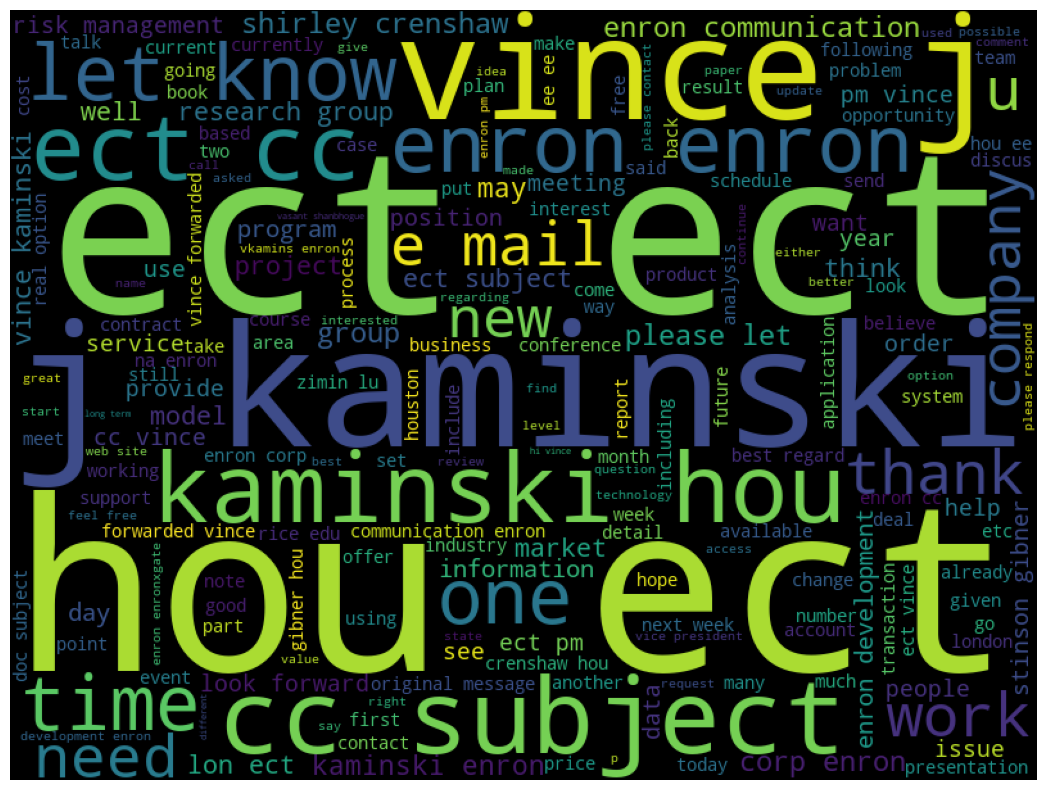

In [25]:
import matplotlib
import pylab as plt

#data visualization in terms of words number 
# 
from wordcloud import WordCloud
cloud=WordCloud(width=800, height=600).generate(" ".join(data0['text'])) 
plt.figure(figsize=(16,10))
plt.imshow(cloud)
plt.axis('off')

In [32]:
from sklearn.model_selection import train_test_split
X_train_email, X_test_email, y_train, y_test = train_test_split(data0['text'], 
                                                    data0['spam'], 
                                                    random_state=42)

# Here data0['text'] is X and data0['spam'] is y for both test and training data
print('Number of rows in the total set: {}'.format(data0.shape[0]))
print('Number of rows in the training set: {}'.format(X_train_email.shape[0]))
print('Number of rows in the test set: {}'.format(X_test_email.shape[0]))

Number of rows in the total set: 5728
Number of rows in the training set: 4296
Number of rows in the test set: 1432


In [33]:
#Step 1: Initialize a dictionary about the trainning data set.
#
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(ngram_range=(1, 1), lowercase = True , stop_words =  'english')

count_vector.fit(X_train_email) 
# what are the words in our dictionary?
print(sorted(count_vector.vocabulary_))

#Step 2: Represent our email in training set in form of vector
#
# Fit the training data and then return the matrix
X_train = count_vector.fit_transform(X_train_email) 
# to get the the list of feature words that are lowercase with no puttutaion or stop words
#Since you fit transform X data training
# they convert data to integer data

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
X_test = count_vector.transform(X_test_email)
#Since you transform X data testing
# they convert data to integer data

['aa', 'aaa', 'aadedeji', 'aagrawal', 'aal', 'aaldous', 'aall', 'aanalysis', 'aaron', 'aawesome', 'ab', 'aba', 'abacha', 'abacus', 'abahy', 'abaixo', 'abandon', 'abandoned', 'abandonment', 'abargain', 'abarr', 'abattoir', 'abb', 'abbas', 'abbott', 'abbreviated', 'abbreviation', 'abc', 'abcsearch', 'abdalla', 'abdallat', 'abdul', 'abdulla', 'abdullah', 'abeis', 'abel', 'abello', 'abetted', 'abeyance', 'abhay', 'abide', 'abidjan', 'abiiity', 'abilene', 'ability', 'abilmesi', 'abit', 'abitibi', 'abl', 'able', 'abler', 'abliged', 'ablx', 'ably', 'abn', 'abnegate', 'abnormal', 'abnormality', 'aboard', 'abolish', 'abook', 'aboriginal', 'abormalities', 'abort', 'abouts', 'aboutus', 'abovenet', 'abqewvbgf', 'abraham', 'abramowicz', 'abrams', 'abrasive', 'abreast', 'abreo', 'abridged', 'abroad', 'absconded', 'absence', 'absense', 'absent', 'absolute', 'absolutely', 'absolve', 'absolved', 'absorb', 'absorbing', 'absorbowac', 'absorption', 'absoutely', 'abstained', 'abstract', 'abstruse', 'absult

In [34]:
X_train_feature_list = count_vector.get_feature_names_out()
X_train_feature_list

array(['aa', 'aaa', 'aadedeji', ..., 'zzn', 'zzncacst', 'zzzz'],
      dtype=object)

In [35]:
doc_array =  X_train.toarray()
doc_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [36]:
frequency_matrix_X_train = pd.DataFrame((doc_array),columns = X_train_feature_list)
frequency_matrix_X_train

,aa,aaa,aadedeji,aagrawal,aal,aaldous,aall,aanalysis,aaron,aawesome,...,zwrocic,zwwyw,zwzm,zxghlajf,zyc,zygoma,zymg,zzn,zzncacst,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#Step 3: Using model for prediction.
# We are using Naive-Bayes, SVM, KNN, Randomforest
#
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train.toarray() , y_train)

GaussianNB()

In [40]:
predictions = naive_bayes.predict(X_test.toarray())
predictions

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [41]:
#Step 4: Using metrics to evaluate the performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(predictions,y_test)))
print('Precision score: ', format(precision_score(predictions,y_test)))
print('Recall score: ', format(recall_score(predictions,y_test)))
print('F1 score: ', format(f1_score(predictions,y_test)))

Accuracy score:  0.9511173184357542
Precision score:  0.8617886178861789
Recall score:  0.9436201780415431
F1 score:  0.9008498583569406


In [45]:
from sklearn import svm
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
param_grid_SVM = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}


gs_svm = GridSearchCV(SVC(),param_grid_SVM,cv=10) 
gs_svm.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']})

In [49]:
gs_svm.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [50]:
gs_svm.best_score_

0.9862628069604813

In [51]:
#Create a svm Classifier
clf = svm.SVC(C=100, gamma=0.0001,kernel='rbf') 

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [52]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Precision score: ', format(precision_score(y_pred,y_test)))
print('Recall score: ', format(recall_score(y_pred,y_test)))
print('F1 score: ', format(f1_score(y_pred,y_test))) 

Accuracy: 0.986731843575419
Precision score:  0.959349593495935
Recall score:  0.9888268156424581
F1 score:  0.9738651994497937


In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:

#Defining a number of folders for GridSearchCV and assigning TT.

param_grid = {'n_neighbors': list(range(1,9)),'weights' : ['uniform','distance'],'metric' : ['minkowski','euclidean','manhattan'] }
gs_knn = GridSearchCV(KNeighborsClassifier(),param_grid,cv=10)
gs_knn.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=2),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8],
                         'weights': ['uniform', 'distance']})

In [47]:
gs_knn.best_score_

0.9164243508429554

In [48]:
# get the hyperparameters with the best score
gs_knn.best_params_

{'metric': 'minkowski', 'n_neighbors': 4, 'weights': 'distance'}

In [20]:
knn = KNeighborsClassifier(n_neighbors = 4, weights = 'distance',metric = 'minkowski')
knn.fit(X_train, y_train) 
y_pred_knn = knn.predict(X_test)

In [21]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))
print('Precision score: ', format(precision_score(y_pred_knn,y_test)))
print('Recall score: ', format(recall_score(y_pred_knn,y_test)))
print('F1 score: ', format(f1_score(y_pred_knn,y_test))) 

Accuracy: 0.9127094972067039
Precision score:  0.7344173441734417
Recall score:  0.9093959731543624
F1 score:  0.8125937031484257


In [53]:
from sklearn.ensemble import RandomForestClassifier
param_grid_RF = {'n_estimators': [25, 50, 100, 150],'max_features': ['sqrt', 'log2', None],'max_depth': [3, 6, 9],'max_leaf_nodes': [3, 6, 9],}
gs_rf = GridSearchCV(RandomForestClassifier(),param_grid_RF,cv=10)
gs_rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]})

In [54]:
gs_rf.best_score_

0.9297002222583618

In [55]:
gs_rf.best_params_

{'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': 9,
 'n_estimators': 100}

In [56]:
rf = RandomForestClassifier(n_estimators=100,max_depth=9,max_leaf_nodes=9,max_features=None,n_jobs=-1)
rf_model = rf.fit(X_train, y_train)
y_pred_rf=rf_model.predict(X_test)

In [57]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print('Precision score: ', format(precision_score(y_pred_rf,y_test)))
print('Recall score: ', format(recall_score(y_pred_rf,y_test)))
print('F1 score: ', format(f1_score(y_pred_rf,y_test))) 

Accuracy: 0.9301675977653632
Precision score:  0.9295392953929539
Recall score:  0.8225419664268585
F1 score:  0.8727735368956742
